### Import Library
Import required library

In [2]:
from glob import glob

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

### Load Files

load and Combine all files

In [5]:
file_paths = glob('./data/raw/*')

dfs = []

for filepath in file_paths:
    dfs.append(pd.read_csv(filepath))

df = pd.concat(dfs)

In [6]:
# save combined dataset
df.to_csv('./data/clean/combined_data.csv', index=False)


In [18]:
# load combined dataset
df = pd.read_csv("./data/clean/combined_data.csv")
df = df.drop_duplicates()

C:\Users\ratne\AppData\Local\Temp\ipykernel_14748\3093500209.py:2: DtypeWarning: Columns (0,18,20,21,25,27,28,29,30,31,32,34,35,36,37,38,39,40,41,46,47,48,49,50,51,52,53,57,58,59,60,61) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./data/clean/combined_data.csv")


In [20]:
# Select and rename important columns
df_core = df[['title', 'required_experience', 'employment_type', 'fraudulent', 'telecommuting']].copy()
df_core.columns = ['job_title', 'required_experience', 'employment_type', 'fraudulent', 'is_remote']

In [22]:
# rop rows where 'fraudulent' is missing
df_core = df_core.dropna(subset=['fraudulent'])

In [24]:
# Clean 'required_experience' and categorize
df_core['required_experience'] = df_core['required_experience'].str.lower().str.strip()
experience_map = {
    'entry level': 'entry',
    'internship': 'entry',
    'associate': 'entry',
    'mid-senior level': 'mid',
    'director': 'executive',
    'executive': 'executive',
    'not applicable': 'unknown',
    'not specified': 'unknown'
}
df_core['experience_category'] = df_core['required_experience'].map(experience_map).fillna('unknown')


In [26]:
# Clean employment type and remote status
df_core['employment_type'] = df_core['employment_type'].str.lower().str.strip()
df_core['is_remote'] = df_core['is_remote'].map({1.0: 'Remote', 0.0: 'Not Remote'})

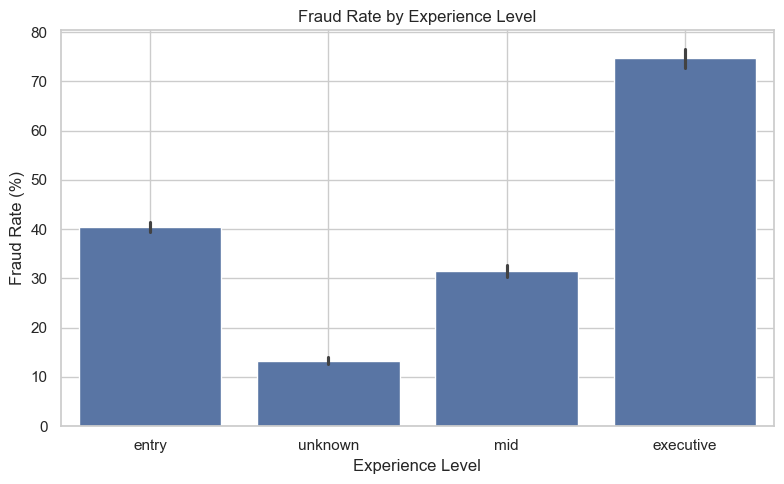

In [28]:
# Plot 1 - Fraud Rate by Experience Level
plt.figure(figsize=(8, 5))
sns.barplot(data=df_core, x='experience_category', y='fraudulent', estimator=lambda x: x.mean() * 100)
plt.title('Fraud Rate by Experience Level')
plt.ylabel('Fraud Rate (%)')
plt.xlabel('Experience Level')
plt.grid(True)
plt.tight_layout()
plt.savefig("manifest/images/fraud_rate_by_experience.png")
plt.show()



- **Executive-level** roles have the **highest fraud rate** (~75%).
- **Entry-level** roles are also highly targeted (~40%).
- **Mid-level** roles show a lower but still notable fraud rate (~30%).
- **Unknown** experience roles have the lowest fraud rate (~13%).

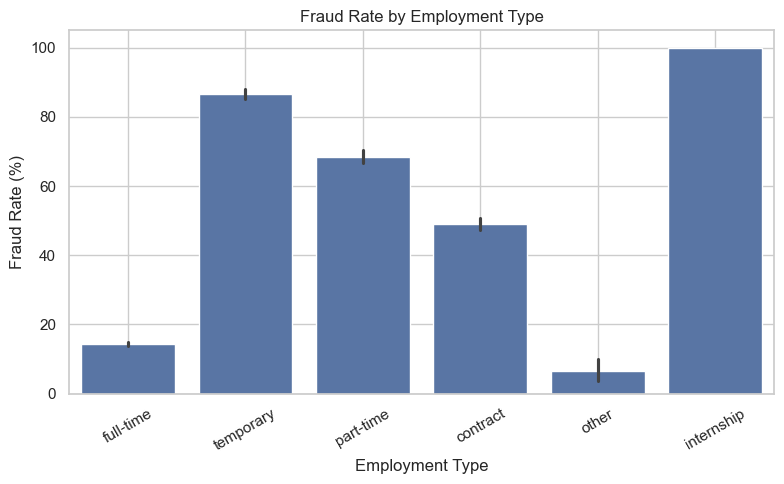

In [30]:
# Plot 2 - Fraud Rate by Employment Type
plt.figure(figsize=(8, 5))
sns.barplot(data=df_core, x='employment_type', y='fraudulent', estimator=lambda x: x.mean() * 100)
plt.title('Fraud Rate by Employment Type')
plt.ylabel('Fraud Rate (%)')
plt.xlabel('Employment Type')
plt.xticks(rotation=30)
plt.grid(True)
plt.tight_layout()
plt.savefig("manifest/images/fraud_rate_by_employment_type.png")
plt.show()


- **Internships** have an extreme fraud rate (~100%).
- **Temporary (~87%)** and **Part-time (~69%)** roles are also highly exploited.
- **Full-time** jobs are significantly safer (~14%).


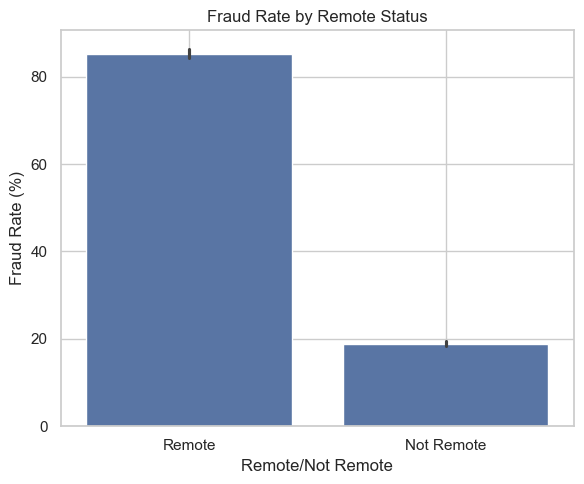

In [31]:

# Plot 3 - Fraud Rate by Remote vs Not Remote
plt.figure(figsize=(6, 5))
sns.barplot(data=df_core, x='is_remote', y='fraudulent', estimator=lambda x: x.mean() * 100)
plt.title('Fraud Rate by Remote Status')
plt.ylabel('Fraud Rate (%)')
plt.xlabel('Remote/Not Remote')
plt.grid(True)
plt.tight_layout()
plt.savefig("manifest/images/fraud_rate_by_remote_status.png")
plt.show()



- **Remote jobs** show a fraud rate over **85%**.
- **On-site (Not Remote)** roles are much safer (~19%).


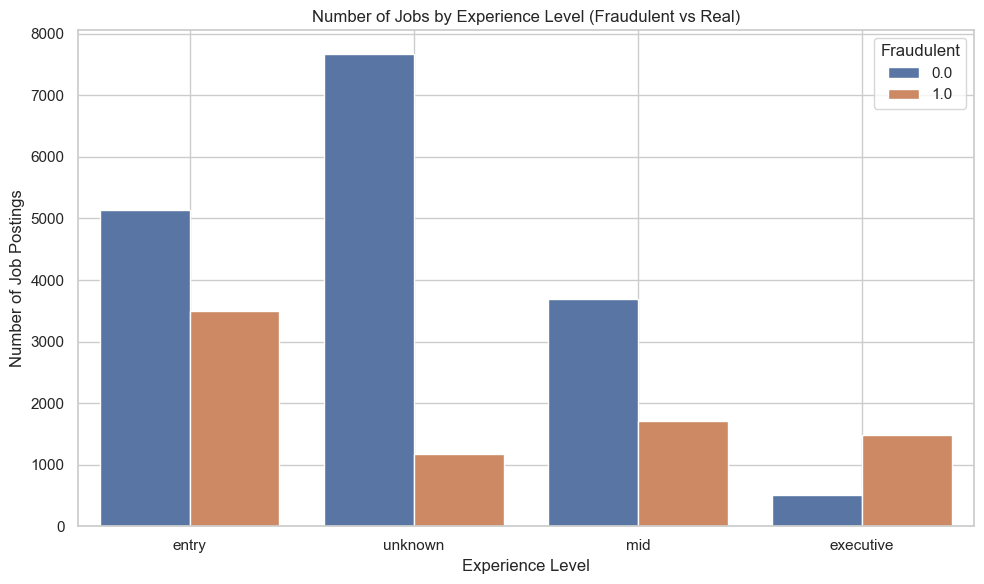

In [34]:

# Plot 4 - Count of Jobs by Experience Level and Fraud
plt.figure(figsize=(10, 6))
sns.countplot(data=df_core, x='experience_category', hue='fraudulent')
plt.title('Number of Jobs by Experience Level (Fraudulent vs Real)')
plt.xlabel('Experience Level')
plt.ylabel('Number of Job Postings')
plt.legend(title='Fraudulent')
plt.grid(True)
plt.tight_layout()
plt.savefig("manifest/images/job_count_by_experience_and_fraud.png")
plt.show()





- **Entry-level and executive roles** have a significant number of fraudulent postings.


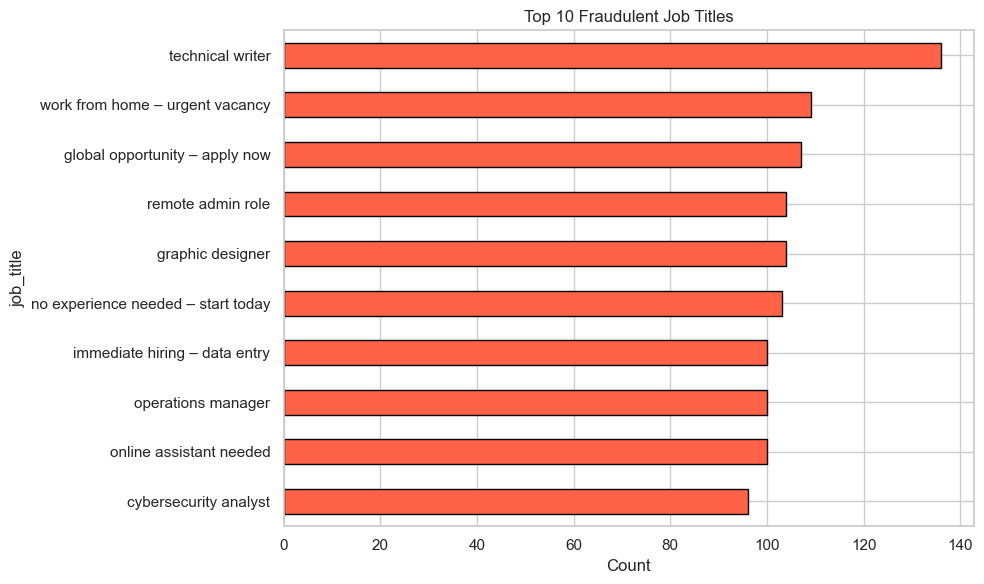

In [36]:
# Plot 5 - Top 10 Fraudulent Job Titles
top_fraud_titles = df_core[df_core['fraudulent'] == 1]['job_title'].str.lower().value_counts().head(10)
plt.figure(figsize=(10, 6))
top_fraud_titles.plot(kind='barh', color='tomato', edgecolor='black')
plt.title('Top 10 Fraudulent Job Titles')
plt.xlabel('Count')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("manifest/images/top_fraudulent_job_titles.png")
plt.show()

- Frequently used scam titles include:
  - *“Work from home – urgent vacancy”*
  - *“No experience needed – start today”*
  - *“Remote admin role”*
  - *“Data entry”, “Technical writer”, “Online assistant”*  
- These titles are **vague**, **enticing**, and often **target freshers**.